In [2]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/Sachin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sachin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
book_filenames = sorted(glob.glob("Python 2017/data/trial.txt"))
print("Found books:")
book_filenames

Found books:


['Python 2017/data/trial.txt']

In [51]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'Python 2017/data/trial.txt'...
Corpus is now 1976 characters long



In [7]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

NameError: name 'logging' is not defined

Found books:


[]

Found books:


[]

Found books:


['Python 2017/data/got1.txt',
 'Python 2017/data/got2.txt',
 'Python 2017/data/got3.txt',
 'Python 2017/data/got4.txt',
 'Python 2017/data/got5.txt',
 'Python 2017/data/test.txt']

In [76]:
book_filenames = sorted(glob.glob("Python 2017/data/trial.txt"))
print("Found books:")
book_filenames

Found books:


['Python 2017/data/trial.txt']

In [77]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'Python 2017/data/trial.txt'...
Corpus is now 3495 characters long



In [78]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [79]:
raw_sentences = tokenizer.tokenize(corpus_raw)


In [80]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [81]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [82]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

We then shortlisted the best five restaurants and created a competition for first place,” Thani told Gulf News.
[u'We', u'then', u'shortlisted', u'the', u'best', u'five', u'restaurants', u'and', u'created', u'a', u'competition', u'for', u'first', u'place', u'Thani', u'told', u'Gulf', u'News']


In [83]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 552 tokens


In [84]:
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 0

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 5

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [85]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)


In [86]:
thrones2vec.build_vocab(sentences)

In [87]:
print("Word2Vec vocabulary length:", len(thrones2vec.vocab))

Word2Vec vocabulary length: 336


In [88]:
thrones2vec.train(sentences)

2014

In [89]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [90]:
thrones2vec.save(os.path.join("trained", "test.w2v"))

In [91]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "test.w2v"))

In [92]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [93]:
all_word_vectors_matrix = thrones2vec.syn0

In [94]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [95]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [96]:
points

,word,x,y
0,rifles,-24.213575,-3.010552
1,bomb,-34.507851,-26.001103
2,feedback,10.043544,4.857262
3,Thani,-2.697313,-49.748048
4,Paris,2.861666,-28.239175
5,over,14.414274,17.500368
6,fall,20.078810,10.250752
7,Islamic,28.367043,19.137521
8,mission,-10.653073,-9.090438
9,ala,-22.907893,-12.692373


In [97]:
sns.set_context("poster")

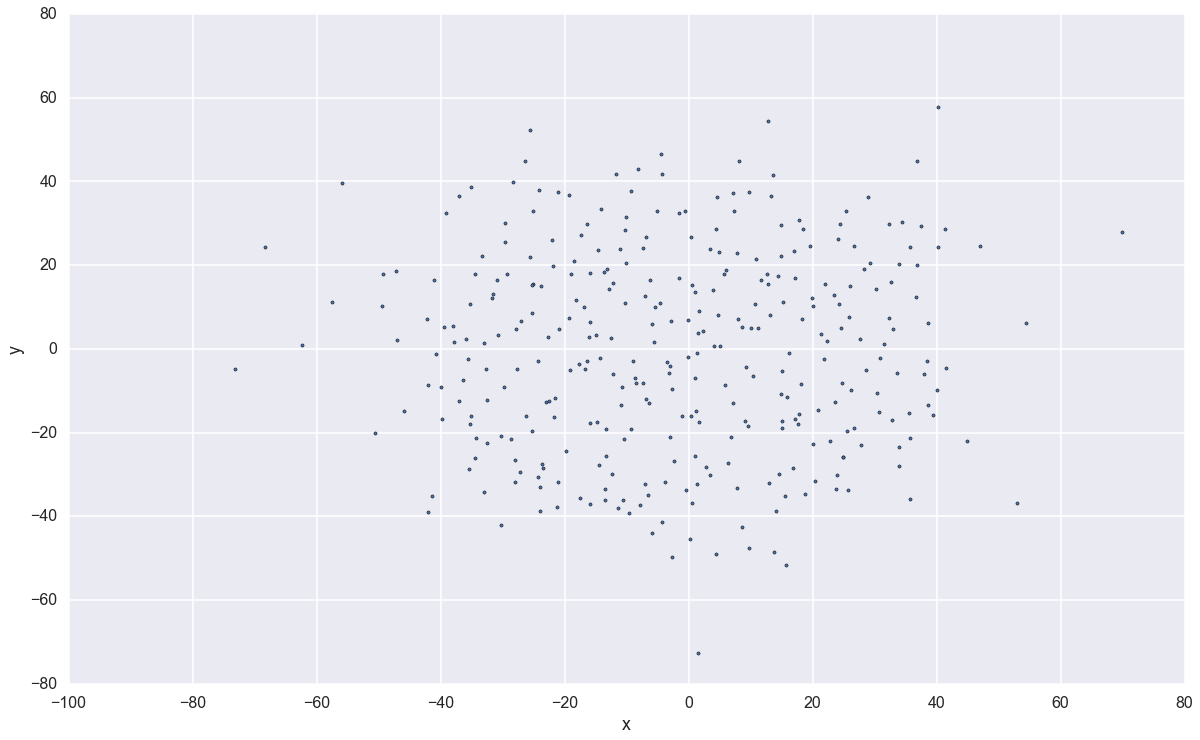

In [98]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [35]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "test.w2v"))

In [36]:
all_word_vectors_matrix = thrones2vec.syn0

In [37]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [38]:
pointsTrain = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [39]:
pointsTrain

,word,x,y
0,all,-19.372383,-37.957408
1,rifles,-191.233436,18.626565
2,consider,48.237699,-83.599030
3,just,63.335930,97.865377
4,less,-20.125968,-22.863379
5,Paris,-71.701289,-35.527307
6,Islamic,80.138057,-71.729156
7,ala,-15.243868,45.559471
8,lands,54.828588,-3.296577
9,Hashr,-62.990132,-10.326924
